## GOTLAND DEEP MODEL CASE

This is the result from the unmodified Gotland Deep example by Burchard et al. https://gotm.net/cases/gotland_deep/

Access to the case study files is here: https://github.com/gotm-model/cases/tree/v6.0/gotland

The results are only for a year but one can modify the `gotm.yaml` file for the GOTM run and set different time windows. The result shows that heat fluxes dominate turbulence production in this simple 1D experiment. 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from netCDF4 import Dataset
import os
from os import path
import pandas as pd

In [94]:
data = './gotland.nc' 
gl = xr.open_dataset(data,decode_times=True)
gl

<xarray.Dataset> Size: 17MB
Dimensions:             (time: 366, lon: 1, lat: 1, z: 200, zi: 201)
Coordinates:
  * time                (time) datetime64[ns] 3kB 1990-01-01 ... 1991-01-01
  * lon                 (lon) float32 4B 20.0
  * lat                 (lat) float32 4B 57.3
    z                   (time, z, lat, lon) float32 293kB ...
    zi                  (time, zi, lat, lon) float32 294kB ...
Data variables: (12/106)
    temp                (time, z, lat, lon) float32 293kB ...
    salt                (time, z, lat, lon) float32 293kB ...
    rho                 (time, z, lat, lon) float32 293kB ...
    temp_obs            (time, z, lat, lon) float32 293kB ...
    salt_obs            (time, z, lat, lon) float32 293kB ...
    u                   (time, z, lat, lon) float32 293kB ...
    ...                  ...
    us0                 (time, lat, lon) float32 1kB ...
    vs0                 (time, lat, lon) float32 1kB ...
    ds                  (time, lat, lon) float32 1kB ...
    Ekin                (time, lat, lon) float32 1kB ...
    Epot                (time, lat, lon) float32 1kB ...
    Eturb               (time, lat, lon) float32 1kB ...
Attributes:
    title:    Gotland Basin
    comment:  file created by flexout - https://github.com/BoldingBruggeman/f...

In [95]:
xq,yq = np.meshgrid(np.squeeze(gl.time),np.squeeze(gl.z[1,:]))

Text(0.5, 1.0, 'Temperature [GOTM]')

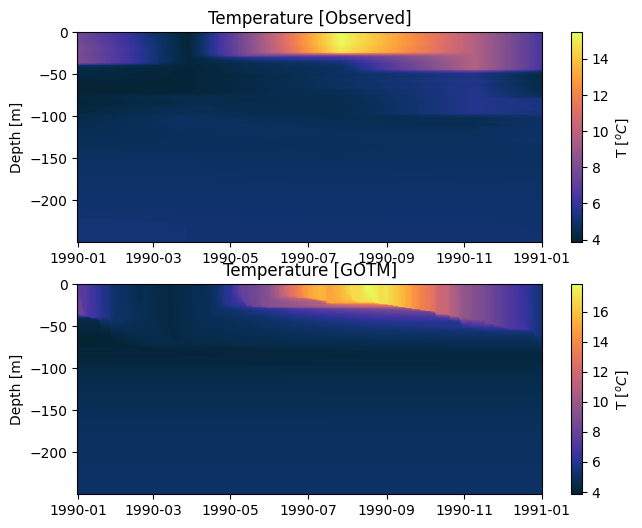

In [106]:
import cmocean.cm as cmo

# Plot Synoptics
fig, ax = plt.subplots(2,1, figsize=(7.5, 6))
pc1=ax[0].pcolor(xq,yq,np.transpose(np.squeeze(gl.temp_obs.to_numpy())),cmap=cmo.thermal)
ax[0].set_ylabel('Depth [m]')
cbar1 = plt.colorbar(pc1, ax=ax[0])
cbar1.set_label('T [$^o C$]')
ax[0].set_title('Temperature [Observed]')

pc2=ax[1].pcolor(xq,yq,np.transpose(np.squeeze(gl.temp.to_numpy())),cmap=cmo.thermal)
ax[1].set_ylabel('Depth [m]')
cbar2 = plt.colorbar(pc2, ax=ax[1])
cbar2.set_label('T [$^o C$]')
ax[1].set_title('Temperature [GOTM]')

In [107]:
xqi,yqi = np.meshgrid(np.squeeze(gl.time),np.squeeze(gl.zi[1,:]))

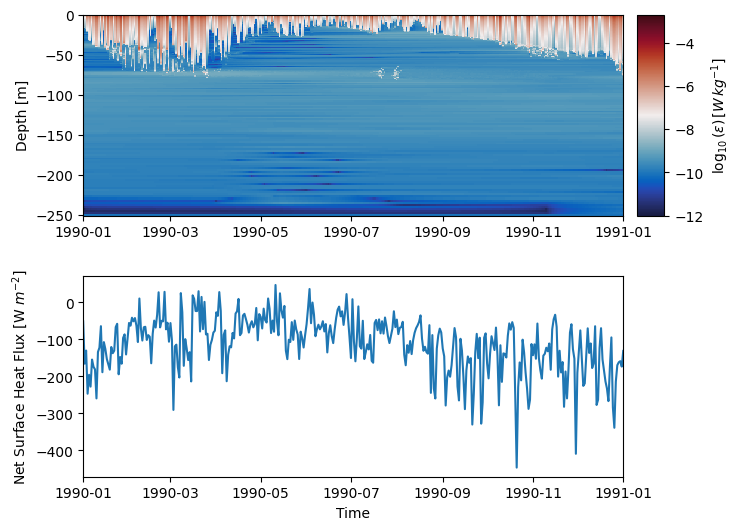

In [148]:
# Create a figure with GridSpec
fig = plt.figure(figsize=(7.5, 6))
gs = fig.add_gridspec(2, 2, width_ratios=[1, 0.05], height_ratios=[1, 1])

ax0 = fig.add_subplot(gs[0, 0])
pc1 = ax0.pcolor(xqi, yqi, np.log10(np.transpose(np.squeeze(gl.eps.to_numpy()))), cmap=cmo.balance)
ax0.set_ylabel('Depth [m]')
ax0.set_xlim(gl.time[0], gl.time[-1])

cbar_ax = fig.add_subplot(gs[0, 1])
fig.colorbar(pc1, cax=cbar_ax, label=r'$\log_{10}(\epsilon) \, [W \, kg^{-1}]$')

ax1 = fig.add_subplot(gs[1, 0])
ax1.plot(gl.time, np.squeeze(gl.heat))
ax1.set_ylabel('Net Surface Heat Flux [W $m^{-2}$]')
ax1.set_xlim(gl.time[0], gl.time[-1])
ax1.set_xlabel('Time')

# Hide the empty subplot area in the second row, second column
gs.update(wspace=0.05, hspace=0.3)
plt.show()